# LOADING DATA

In [1]:
# import packages
import os
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np     
from sklearn.preprocessing import RobustScaler
import sklearn

## read airbnb data

In [2]:
# read airbnb listing data
airbnb = pd.read_csv('London-2019-11-listings.csv')
airbnb.head()

/tmp/ipykernel_211/2576548823.py:2: DtypeWarning: Columns (0,2,6,7,9,10,11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('London-2019-11-listings.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
0,9582415,Single/Twin/Double Ensuite near Twickenham Sta...,49602995,Daniela,,Richmond upon Thames,51.44473,-0.379,Private room,35,1,47,2019-11-06,2.27,1,278,Private room,11/6/2019 0:00:00
1,23013522,"Spacious room with double bed for 2, Twickenham",70374572,Monk,,Hounslow,51.45867,-0.34444,Private room,19,1,131,2019-11-06,6.52,3,23,Private room,11/6/2019 0:00:00
2,25796711,Stunning Central London Apartment Close The River,25587547,Matthew,,Hammersmith and Fulham,51.47398,-0.21531,Entire home/apt,103,7,8,2019-11-06,0.51,1,317,Entire home/apt,11/6/2019 0:00:00
3,29060134,Recently renovated fabulous four bedroom house,57607790,Shofraz,,Hillingdon,51.52716,-0.44164,Entire home/apt,85,14,5,2019-11-06,0.4,1,346,Entire home/apt,11/6/2019 0:00:00
4,30374086,Lovely cosy flat for 4 in Heart of North London,228095684,Yashar,,Barnet,51.59118,-0.1667,Entire home/apt,85,3,16,2019-11-06,1.52,3,139,Entire home/apt,11/6/2019 0:00:00


In [3]:
# covert to numeric
airbnb['longitude'] = pd.to_numeric(airbnb['longitude'],errors='coerce')
airbnb['latitude'] = pd.to_numeric(airbnb['latitude'],errors='coerce')
airbnb['reviews_per_month'] = pd.to_numeric(airbnb['reviews_per_month'],errors='coerce')
airbnb['price'] = pd.to_numeric(airbnb['price'],errors='coerce')
airbnb['minimum_nights'] = pd.to_numeric(airbnb['minimum_nights'],errors='coerce')
airbnb['number_of_reviews'] = pd.to_numeric(airbnb['number_of_reviews'],errors='coerce')
airbnb['calculated_host_listings_count'] = pd.to_numeric(airbnb['calculated_host_listings_count'],errors='coerce')
airbnb['availability_365'] = pd.to_numeric(airbnb['availability_365'],errors='coerce')

<AxesSubplot:>

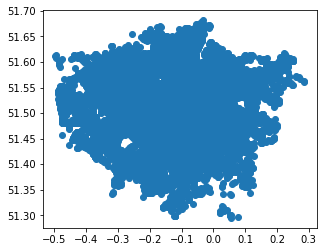

In [4]:
# read location
point = gpd.GeoDataFrame(
    airbnb, geometry=gpd.points_from_xy(x=airbnb.longitude, y=airbnb.latitude) )
point = point.set_crs(4326)
point.plot()

## read LSOA shapefile data

In [5]:
# read shapefile data
LSOA = gpd.read_file("LSOA_2011_London_gen_MHW.shp")  # read shapefile
LSOA.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [6]:
# calculate area
LSOA['area'] = LSOA.area
LSOA.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18...",133320.768859
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",226191.273063
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18...",57302.966528
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18...",190738.760508
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",144195.846859


<AxesSubplot:>

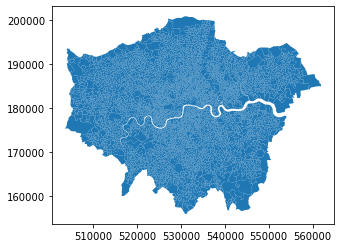

In [7]:
LSOA.plot()

## join airbnb data with LSOA shapefile

In [8]:
print(point.crs)
print(LSOA.crs)

epsg:4326
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [9]:
LSOA4326  = LSOA.to_crs('epsg:4326')

In [10]:
join = gpd.sjoin(point, LSOA4326, predicate='within') 
join.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,area
0,9582415,Single/Twin/Double Ensuite near Twickenham Sta...,49602995,Daniela,,Richmond upon Thames,51.44473,-0.37900,Private room,35.0,...,Richmond upon Thames,E12000007,London,1626,1615,11,39.6,622,2.6,411623.965047
67449,9730457,Beautiful Room in House,23185644,Kaycee,,Richmond upon Thames,51.44392,-0.37378,Private room,16.0,...,Richmond upon Thames,E12000007,London,1626,1615,11,39.6,622,2.6,411623.965047
69896,16375744,Spacious 4 bedroom house in leafy Twickenham,106792442,Serena,,Richmond upon Thames,51.44346,-0.36928,Entire home/apt,150.0,...,Richmond upon Thames,E12000007,London,1626,1615,11,39.6,622,2.6,411623.965047
1,23013522,"Spacious room with double bed for 2, Twickenham",70374572,Monk,,Hounslow,51.45867,-0.34444,Private room,19.0,...,Hounslow,E12000007,London,1318,1318,0,63.8,479,2.8,210715.524645
1723,22962647,Cosy single next to Twickenham stadium & Heathrow,165537614,Francesca,,Hounslow,51.45836,-0.34430,Private room,20.0,...,Hounslow,E12000007,London,1318,1318,0,63.8,479,2.8,210715.524645


# calculate density

In [11]:
join['number'] = 1 # prepare for calculate number of airbnb points by LSOA
join2 = join[['number','LSOA11CD',"price","minimum_nights","reviews_per_month", "calculated_host_listings_count","availability_365"]]
d = {'number':'summary', 'price':'m_price', 'm_nights':'m_minnights','reviews_per_month':'m_monreview', 
     'calculated_host_listings_count':'m_hostlisting','availability_365':'m_avaliable'}

joingroup=join2.groupby('LSOA11CD').agg({'number':'sum', 'price':'mean','minimum_nights':'mean','reviews_per_month':'mean',
                                     'calculated_host_listings_count':'mean','availability_365':'mean'}).rename(columns=d)

joingroup['m_avaliable'] = joingroup['m_avaliable']/365
joingroup.head()

,summary,m_price,minimum_nights,m_monreview,m_hostlisting,m_avaliable
LSOA11CD,,,,,,
E01000001,17,151.176471,7.705882,1.015000,26.411765,0.514102
E01000002,10,200.400000,3.800000,1.506667,4.800000,0.215890
E01000003,7,139.428571,15.428571,0.305714,13.428571,0.035225
E01000005,69,138.478261,3.666667,1.230800,21.405797,0.300417
E01000006,5,44.200000,3.000000,0.465000,1.200000,0.451507


In [12]:
# rejoin groupby results with shapefile

LSOAairbnb = LSOA4326.merge(joingroup, on='LSOA11CD', how='left')
LSOAairbnb['density'] = LSOAairbnb['summary']/LSOAairbnb['area']
LSOAairbnb.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,AVHHOLDSZ,geometry,area,summary,m_price,minimum_nights,m_monreview,m_hostlisting,m_avaliable,density
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,1.7,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027...",133320.768859,17.0,151.176471,7.705882,1.015000,26.411765,0.514102,0.000128
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,1.7,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752...",226191.273063,10.0,200.400000,3.800000,1.506667,4.800000,0.215890,0.000044
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,1.5,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282...",57302.966528,7.0,139.428571,15.428571,0.305714,13.428571,0.035225,0.000122
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,2.1,"POLYGON ((-0.07323 51.51000, -0.07553 51.50974...",190738.760508,69.0,138.478261,3.666667,1.230800,21.405797,0.300417,0.000362
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,3.1,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...",144195.846859,5.0,44.200000,3.000000,0.465000,1.200000,0.451507,0.000035


In [13]:
# save as shapefile
LSOAairbnb.to_file('LSOAairbnb.shp')  

/tmp/ipykernel_211/548482224.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  LSOAairbnb.to_file('LSOAairbnb.shp')


# kernel density map - not avaliable

import geoplot as gplt
import geoplot.crs as gcrs

fig,ax = plt.subplots(figsize=(8,5),dpi=200)
proj = projection=gcrs.AlbersEqualArea(central_latitude=51, central_longitude=0)
ax = plt.subplot(projection=proj)
gplt.kdeplot(
    join2,
    cmap = "Spectral_r",
    clip = LSOAairbnb.geometry,
    projection=proj,
    levels=12, 
    thresh=.0005,
    shade=True,
    ax=ax,
)
gplt.polyplot(LSOAairbnb, zorder=1,facecolor="none",linewidth=.3,ax=ax)
plt.title("Geoplot Test2",fontsize = 18)

plt.text(.85,.25,'\nVisualization by DataCharm',transform = ax.transAxes,
        ha='center', va='center',fontsize = 5,fontweight="bold")

# 5.1 AIRBNB density map by LSOA - density & review

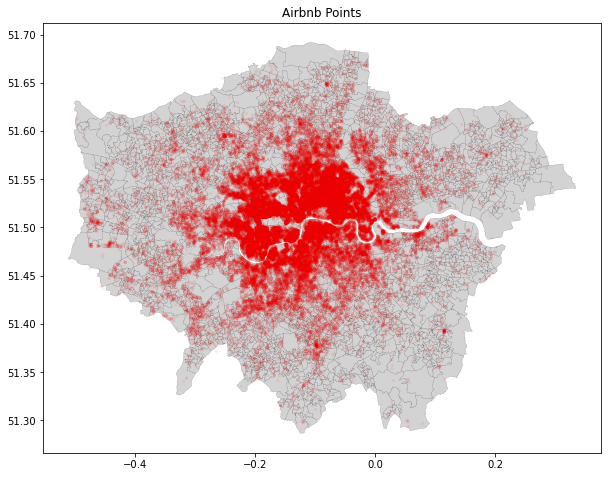

In [14]:
# Airbnb Points

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax,edgecolor="black", linewidth=.1, color='lightgrey')
point.plot(ax=ax,  alpha = .05, markersize = 5, color = 'red')
ax.set_title('Airbnb Points')
plt.savefig('Airbnb Points')

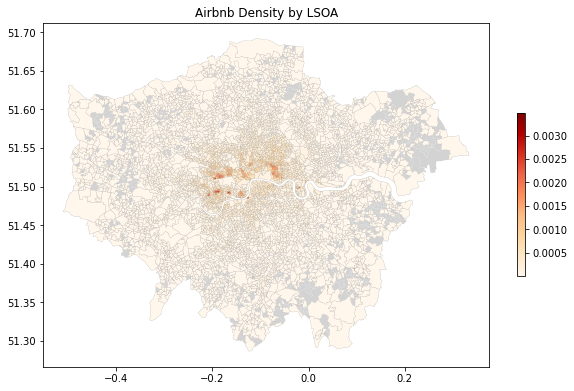

In [15]:
# Airbnb Density by LSOA

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
LSOAairbnb.plot(column = 'density', ax=ax, cmap = 'OrRd', edgecolor="grey", linewidth=.1,
                legend = True,legend_kwds={'shrink': 0.3})
ax.set_title('Airbnb Density by LSOA')
plt.savefig('Airbnb Density')

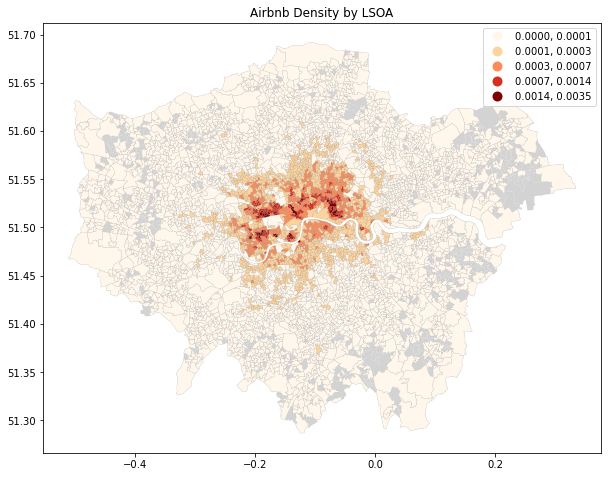

In [16]:
# Airbnb Density by LSOA

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
LSOAairbnb.plot(column = 'density', ax=ax, cmap = 'OrRd', scheme='natural_breaks', edgecolor="grey", linewidth=.1,
                legend = True, legend_kwds={'loc': 'upper right',  'fmt':"{:.4f}"})
ax.set_title('Airbnb Density by LSOA')
plt.savefig('Airbnb Density quantiles')

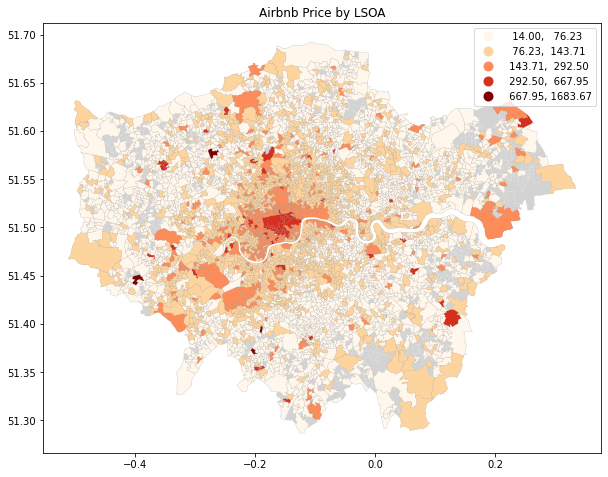

In [17]:
# Airbnb Price by LSOA

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
LSOAairbnb.plot(column = 'm_price', ax=ax, cmap = 'OrRd', edgecolor="grey", linewidth=.1 ,
                scheme='natural_breaks', legend = True)
ax.set_title('Airbnb Price by LSOA')
plt.savefig('Airbnb Price by LSOA')

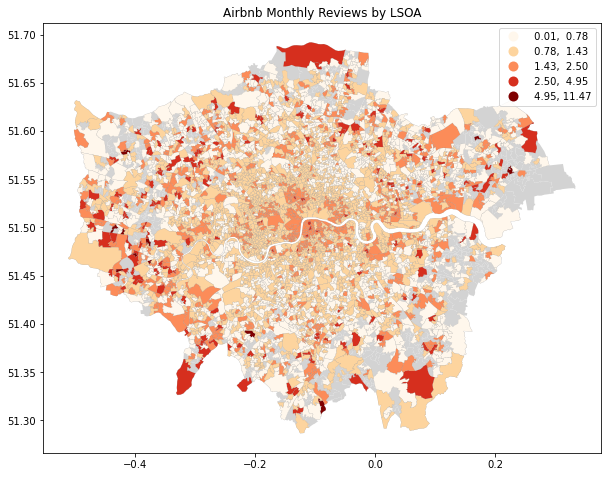

In [18]:
# Airbnb Monthly Reviews by LSOA

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
LSOAairbnb.plot(column = 'm_monreview', ax=ax, cmap = 'OrRd', edgecolor="grey", linewidth=.1 ,
                scheme='natural_breaks', legend = True)
ax.set_title('Airbnb Monthly Reviews by LSOA')
plt.savefig('Airbnb Monthly Reviews by LSOA')

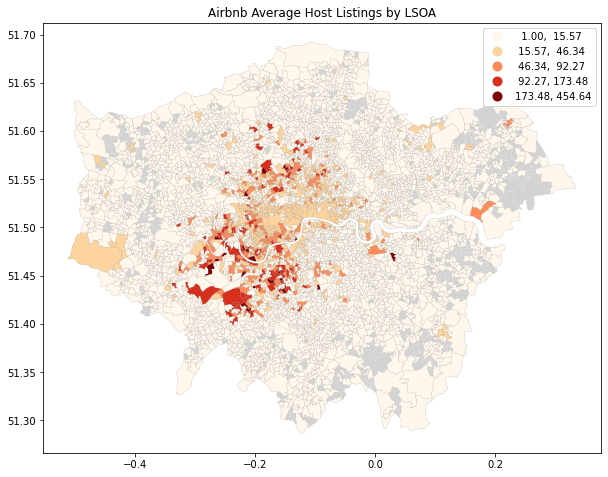

In [19]:
# Airbnb Average Host Listings by LSOA

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
LSOAairbnb.plot(column = 'm_hostlisting', ax=ax, cmap = 'OrRd', edgecolor="grey", linewidth=.1 ,
                scheme='natural_breaks', legend = True)
ax.set_title('Airbnb Average Host Listings by LSOA')
plt.savefig('Airbnb Average Host Listings by LSOA')

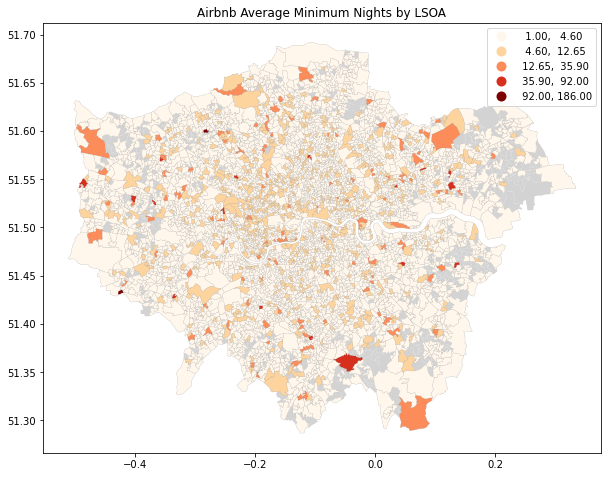

In [20]:
# Airbnb Minimum Nights by LSOA

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
LSOAairbnb.plot(column = 'minimum_nights', ax=ax, cmap = 'OrRd', edgecolor="grey", linewidth=.1 ,
                scheme='natural_breaks', legend = True)
ax.set_title('Airbnb Average Minimum Nights by LSOA')
plt.savefig('Airbnb Average Minimum Nights by LSOA')

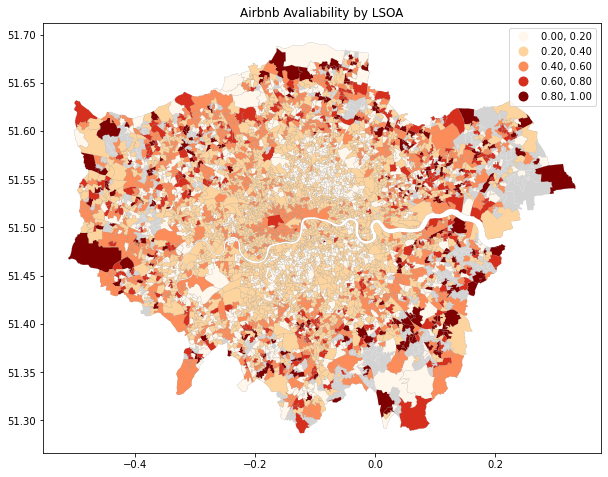

In [21]:
# Airbnb Avaliability in 1 year by LSOA

fig, ax = plt.subplots(figsize = (10,10))
LSOAairbnb.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
LSOAairbnb.plot(column = 'm_avaliable', ax=ax, cmap = 'OrRd', edgecolor="grey", linewidth=.1 ,
                scheme='equalinterval', legend = True)
ax.set_title('Airbnb Avaliability by LSOA')
plt.savefig('Airbnb Avaliability by LSOA')


# read clustered IMD data

In [22]:
cluster = pd.read_csv('data3.csv')
IMD = pd.read_csv('London_imd_2019_cleaning.csv')
IMD.rename(columns = {'Index of Multiple Deprivation (IMD) Score':'imd',
                     'Income Score (rate)':'income',
                     'Employment Score (rate)':'employment',
                     'Education, Skills and Training Score':'edu_ski_tra',
                     'Health Deprivation and Disability Score':'health_depri',
                     'Crime Score':'crime',
                     'Barriers to Housing and Services Score':'hous_serv',
                     'Living Environment Score':'living_env'}, 
          inplace = True)
cluster.head()

,Unnamed: 0,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id
0,0,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,2
1,1,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,2
2,2,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0
3,3,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,1
4,4,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0


In [23]:
IMD01 = IMD.merge(cluster, on='crime', how='left')
IMD01 = IMD01[IMD01['cluster_id'] == 1]
IMD01.head()

,ls11cd,la11nm,london_imd_rank,london_imd_decile,imd,income_x,employment_x,edu_ski_tra_x,health_depri_x,crime,hous_serv_x,living_env_x,Unnamed: 0,income_y,employment_y,edu_ski_tra_y,health_depri_y,hous_serv_y,living_env_y,cluster_id
3,E01000005,City of London,1325,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,3,0.211,0.136,22.260,-0.121,39.900,28.979,1
7,E01000007,Barking and Dagenham,962,2,31.576,0.207,0.107,11.385,-0.027,0.846,50.420,25.995,5,0.207,0.107,11.385,-0.027,50.420,25.995,1
13,E01000008,Barking and Dagenham,423,1,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233,6,0.265,0.151,25.506,0.250,45.413,30.233,1
16,E01000008,Barking and Dagenham,423,1,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233,4280,0.204,0.146,26.700,-0.002,36.402,27.252,1
17,E01000009,Barking and Dagenham,827,2,32.844,0.187,0.109,15.713,0.454,0.895,48.119,28.601,7,0.187,0.109,15.713,0.454,48.119,28.601,1


# Correlation Matrix

In [24]:
# join airbnb with imd
AB = LSOAairbnb[['LSOA11CD', 'density', 'm_price', 'minimum_nights', 'm_monreview', 'm_hostlisting', 'm_avaliable']]
AB.rename(columns = {'LSOA11CD':'ls11cd'},inplace = True)

joinABIMD = IMD01.merge(AB, on='ls11cd', how='left')
joinABIMD.head()

/tmp/ipykernel_211/1315942750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB.rename(columns = {'LSOA11CD':'ls11cd'},inplace = True)


,ls11cd,la11nm,london_imd_rank,london_imd_decile,imd,income_x,employment_x,edu_ski_tra_x,health_depri_x,crime,...,health_depri_y,hous_serv_y,living_env_y,cluster_id,density,m_price,minimum_nights,m_monreview,m_hostlisting,m_avaliable
0,E01000005,City of London,1325,3,28.652,0.211,0.136,22.260,-0.121,-1.317,...,-0.121,39.900,28.979,1,0.000362,138.478261,3.666667,1.230800,21.405797,0.300417
1,E01000007,Barking and Dagenham,962,2,31.576,0.207,0.107,11.385,-0.027,0.846,...,-0.027,50.420,25.995,1,0.000071,62.000000,2.571429,1.375833,2.785714,0.457339
2,E01000008,Barking and Dagenham,423,1,37.596,0.265,0.151,25.506,0.250,0.353,...,0.250,45.413,30.233,1,0.000005,170.000000,3.000000,0.290000,1.000000,0.991781
3,E01000008,Barking and Dagenham,423,1,37.596,0.265,0.151,25.506,0.250,0.353,...,-0.002,36.402,27.252,1,0.000005,170.000000,3.000000,0.290000,1.000000,0.991781
4,E01000009,Barking and Dagenham,827,2,32.844,0.187,0.109,15.713,0.454,0.895,...,0.454,48.119,28.601,1,0.000093,95.916667,4.250000,0.734444,2.750000,0.344064


In [25]:
# what is the Pearson correlation between IMD and Airbnb?
joinABIMD.corr()

,london_imd_rank,london_imd_decile,imd,income_x,employment_x,edu_ski_tra_x,health_depri_x,crime,hous_serv_x,living_env_x,...,health_depri_y,hous_serv_y,living_env_y,cluster_id,density,m_price,minimum_nights,m_monreview,m_hostlisting,m_avaliable
london_imd_rank,1.000000,0.993540,-0.980575,-0.932071,-0.897044,-0.705175,-0.809054,-0.403610,-0.624507,-0.048358,...,-0.111591,-0.012383,-0.111668,NaN,-0.028321,0.172176,0.012774,-0.033994,0.192740,-0.000714
london_imd_decile,0.993540,1.000000,-0.969625,-0.921144,-0.884832,-0.696830,-0.801770,-0.399954,-0.621347,-0.054296,...,-0.108021,-0.010319,-0.110015,NaN,-0.031870,0.173247,0.014536,-0.035328,0.195293,0.003387
imd,-0.980575,-0.969625,1.000000,0.950254,0.926981,0.706332,0.792720,0.413443,0.607093,0.036432,...,0.141026,0.026031,0.120170,NaN,0.021875,-0.163260,-0.014086,0.030175,-0.178846,-0.001450
income_x,-0.932071,-0.921144,0.950254,1.000000,0.942539,0.668200,0.750345,0.285321,0.480933,-0.096952,...,0.112888,-0.014420,0.061008,NaN,0.026550,-0.165452,-0.017873,0.030714,-0.158557,0.003466
employment_x,-0.897044,-0.884832,0.926981,0.942539,1.000000,0.649691,0.742337,0.267293,0.411367,-0.131863,...,0.125668,-0.020879,0.055160,NaN,0.004773,-0.144020,-0.019698,0.016293,-0.139889,0.008988
edu_ski_tra_x,-0.705175,-0.696830,0.706332,0.668200,0.649691,1.000000,0.496347,0.156454,0.434764,-0.283388,...,-0.019297,0.009420,-0.032564,NaN,-0.232019,-0.240714,-0.063322,0.039344,-0.272452,0.156640
health_depri_x,-0.809054,-0.801770,0.792720,0.750345,0.742337,0.496347,1.000000,0.296511,0.354826,0.014545,...,0.217497,-0.028503,0.076260,NaN,0.044808,-0.186748,-0.025618,0.016219,-0.139887,-0.093543
crime,-0.403610,-0.399954,0.413443,0.285321,0.267293,0.156454,0.296511,1.000000,0.143177,0.224500,...,0.127870,-0.049874,0.255335,NaN,0.079342,-0.032064,0.028626,-0.002619,-0.014287,-0.014862
hous_serv_x,-0.624507,-0.621347,0.607093,0.480933,0.411367,0.434764,0.354826,0.143177,1.000000,-0.025895,...,-0.003311,0.244986,0.032929,NaN,-0.140859,-0.181303,-0.009152,0.009657,-0.253035,0.058190
living_env_x,-0.048358,-0.054296,0.036432,-0.096952,-0.131863,-0.283388,0.014545,0.224500,-0.025895,1.000000,...,0.061812,-0.029166,0.311150,NaN,0.374325,0.191153,0.047376,0.039620,0.158021,-0.174786


# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

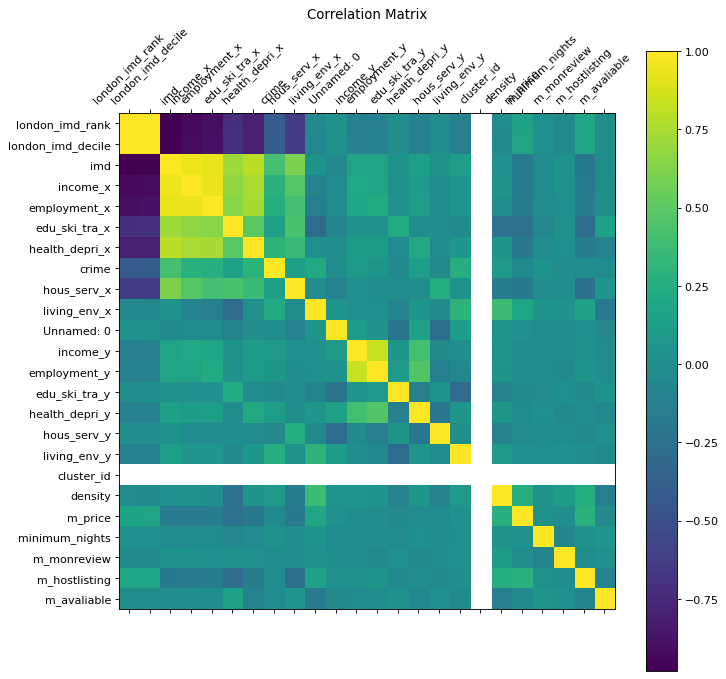

In [26]:
f = plt.figure(figsize=(10, 10), dpi=80)
plt.matshow(joinABIMD.corr(), fignum=f.number)
plt.xticks(range(joinABIMD.select_dtypes(['number']).shape[1]), joinABIMD.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(joinABIMD.select_dtypes(['number']).shape[1]), joinABIMD.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=12)